In [2]:
#Import Dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st
from scipy.stats import linregress
import time
from datetime import datetime

In [3]:
#import raw data csv

input_data_file = "../../RAW DATA/SURVEY RAW DATA 2_CSV.CSV"

# Read in file and store in Pandas data frame
survey_data_df = pd.read_csv(input_data_file)
survey_data_df 


,YEAR,1_SELF_EMPLOY,2_NUM_OF_EMPLOYEES,3_TECH_ORG,4_MH_BEN_PROVIDED,5_AWARE_OF_MH_BENEFITS,6_EMPLOY_FORMALLY_DISCUSS_MH,7_EMPLOY_OFFER_RESOURCES,8_ANONIMITY_PROTECT,9_COMFORT_DISCUSS_SUPERVISOR,...,16_DIAGNOSED_MH_DISORDER,17_DISORDER_INTERFERE_WITH_WORK_WHEN_TREATED,18_DISORDER_INTERFERE_WITH_WORK_WHEN_NOT_TREATED,19_TECH_SUPPORT_EMPLOYEE_w_MH_DISORDER,20_AGE,21_GENDER,22_COUNTRY,23_STATE,24_RACE,25_COUNTRY_2
0,2017,0,100-500,1,No,Yes,No,I don't know,I don't know,Yes,...,NaN,Sometimes,Sometimes,1.0,27.0,Female,United Kingdom,NaN,NaN,United Kingdom
1,2017,0,100-500,1,Yes,Yes,No,No,I don't know,Maybe,...,NaN,Not applicable to me,Sometimes,2.0,31.0,male,United Kingdom,NaN,NaN,United Kingdom
2,2017,0,25-Jun,1,I don't know,No,I don't know,No,Yes,Yes,...,Yes,Sometimes,Sometimes,1.0,36.0,male,United States of America,Missouri,White,United States of America
3,2017,0,More than 1000,1,Yes,Yes,I don't know,I don't know,Yes,Yes,...,Yes,Sometimes,Often,2.0,22.0,Male,United States of America,Washington,White,United States of America
4,2017,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Often,Sometimes,1.0,52.0,female,United States of America,Illinois,More than one of the above,United States of America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,2020,0,More than 1000,0,No,No,No,No,No,No,...,NaN,Sometimes,Often,2.0,53.0,Male,United States of America,New York,Asian,United States of America
1701,2020,0,26-100,1,Yes,Yes,Yes,Yes,I don't know,Maybe,...,NaN,Often,Often,3.0,23.0,F,Philippines,NaN,NaN,Philippines
1702,2020,0,100-500,1,I don't know,No,No,I don't know,I don't know,Maybe,...,Yes,Sometimes,Often,3.0,34.0,Male,United States of America,Tennessee,White,United States of America
1703,2020,0,500-1000,0,Yes,No,Yes,Yes,Yes,No,...,NaN,Rarely,Sometimes,3.0,43.0,Male,Canada,NaN,NaN,Canada


In [4]:
survey_data_df['3_TECH_ORG'].replace('TRUE',"1", inplace=True)
survey_data_df['3_TECH_ORG'].replace('FALSE',"0", inplace=True)

survey_data_df

,YEAR,1_SELF_EMPLOY,2_NUM_OF_EMPLOYEES,3_TECH_ORG,4_MH_BEN_PROVIDED,5_AWARE_OF_MH_BENEFITS,6_EMPLOY_FORMALLY_DISCUSS_MH,7_EMPLOY_OFFER_RESOURCES,8_ANONIMITY_PROTECT,9_COMFORT_DISCUSS_SUPERVISOR,...,16_DIAGNOSED_MH_DISORDER,17_DISORDER_INTERFERE_WITH_WORK_WHEN_TREATED,18_DISORDER_INTERFERE_WITH_WORK_WHEN_NOT_TREATED,19_TECH_SUPPORT_EMPLOYEE_w_MH_DISORDER,20_AGE,21_GENDER,22_COUNTRY,23_STATE,24_RACE,25_COUNTRY_2
0,2017,0,100-500,1,No,Yes,No,I don't know,I don't know,Yes,...,NaN,Sometimes,Sometimes,1.0,27.0,Female,United Kingdom,NaN,NaN,United Kingdom
1,2017,0,100-500,1,Yes,Yes,No,No,I don't know,Maybe,...,NaN,Not applicable to me,Sometimes,2.0,31.0,male,United Kingdom,NaN,NaN,United Kingdom
2,2017,0,25-Jun,1,I don't know,No,I don't know,No,Yes,Yes,...,Yes,Sometimes,Sometimes,1.0,36.0,male,United States of America,Missouri,White,United States of America
3,2017,0,More than 1000,1,Yes,Yes,I don't know,I don't know,Yes,Yes,...,Yes,Sometimes,Often,2.0,22.0,Male,United States of America,Washington,White,United States of America
4,2017,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Often,Sometimes,1.0,52.0,female,United States of America,Illinois,More than one of the above,United States of America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,2020,0,More than 1000,0,No,No,No,No,No,No,...,NaN,Sometimes,Often,2.0,53.0,Male,United States of America,New York,Asian,United States of America
1701,2020,0,26-100,1,Yes,Yes,Yes,Yes,I don't know,Maybe,...,NaN,Often,Often,3.0,23.0,F,Philippines,NaN,NaN,Philippines
1702,2020,0,100-500,1,I don't know,No,No,I don't know,I don't know,Maybe,...,Yes,Sometimes,Often,3.0,34.0,Male,United States of America,Tennessee,White,United States of America
1703,2020,0,500-1000,0,Yes,No,Yes,Yes,Yes,No,...,NaN,Rarely,Sometimes,3.0,43.0,Male,Canada,NaN,NaN,Canada


In [5]:
tech_mental_health = survey_data_df.loc[survey_data_df["3_TECH_ORG"]=="1"]
tech_mental_health

,YEAR,1_SELF_EMPLOY,2_NUM_OF_EMPLOYEES,3_TECH_ORG,4_MH_BEN_PROVIDED,5_AWARE_OF_MH_BENEFITS,6_EMPLOY_FORMALLY_DISCUSS_MH,7_EMPLOY_OFFER_RESOURCES,8_ANONIMITY_PROTECT,9_COMFORT_DISCUSS_SUPERVISOR,...,16_DIAGNOSED_MH_DISORDER,17_DISORDER_INTERFERE_WITH_WORK_WHEN_TREATED,18_DISORDER_INTERFERE_WITH_WORK_WHEN_NOT_TREATED,19_TECH_SUPPORT_EMPLOYEE_w_MH_DISORDER,20_AGE,21_GENDER,22_COUNTRY,23_STATE,24_RACE,25_COUNTRY_2
0,2017,0,100-500,1,No,Yes,No,I don't know,I don't know,Yes,...,NaN,Sometimes,Sometimes,1.0,27.0,Female,United Kingdom,NaN,NaN,United Kingdom
1,2017,0,100-500,1,Yes,Yes,No,No,I don't know,Maybe,...,NaN,Not applicable to me,Sometimes,2.0,31.0,male,United Kingdom,NaN,NaN,United Kingdom
2,2017,0,25-Jun,1,I don't know,No,I don't know,No,Yes,Yes,...,Yes,Sometimes,Sometimes,1.0,36.0,male,United States of America,Missouri,White,United States of America
3,2017,0,More than 1000,1,Yes,Yes,I don't know,I don't know,Yes,Yes,...,Yes,Sometimes,Often,2.0,22.0,Male,United States of America,Washington,White,United States of America
5,2017,0,100-500,1,Yes,No,No,I don't know,Yes,Maybe,...,NaN,Rarely,Not applicable to me,2.0,30.0,male,United States of America,California,White,United States of America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1698,2020,0,26-100,1,Yes,Yes,Yes,Yes,No,No,...,Yes,Sometimes,Often,2.0,40.0,Female,United Kingdom,NaN,NaN,United Kingdom
1699,2020,0,More than 1000,1,I don't know,No,I don't know,I don't know,I don't know,No,...,NaN,Often,Often,2.0,31.0,male,India,NaN,NaN,India
1701,2020,0,26-100,1,Yes,Yes,Yes,Yes,I don't know,Maybe,...,NaN,Often,Often,3.0,23.0,F,Philippines,NaN,NaN,Philippines
1702,2020,0,100-500,1,I don't know,No,No,I don't know,I don't know,Maybe,...,Yes,Sometimes,Often,3.0,34.0,Male,United States of America,Tennessee,White,United States of America


In [36]:
#TBD - What is the level of importance placed on mental health placed by employers over time?
#Only find values in "12_IMPORTANCE_EMPLOY_MENTAL_HEALTH" > 8

# Display all columns to check data
pd.options.display.max_columns = 27

# Create DF with Question 12 values >5
importance_mental_value = tech_mental_health.loc[tech_mental_health["12_IMPORTANCE_EMPLOY_MENTAL_HEALTH"] >= 5 ]
importance_mental_value.head()

,YEAR,1_SELF_EMPLOY,2_NUM_OF_EMPLOYEES,3_TECH_ORG,4_MH_BEN_PROVIDED,5_AWARE_OF_MH_BENEFITS,6_EMPLOY_FORMALLY_DISCUSS_MH,7_EMPLOY_OFFER_RESOURCES,8_ANONIMITY_PROTECT,9_COMFORT_DISCUSS_SUPERVISOR,10_EVER_DISUSS_MH_w_EMPLOY,11_IMPORTANCE_EMPLOY_PHYS_HEALTH,12_IMPORTANCE_EMPLOY_MENTAL_HEALTH,13_IF_DIAGNOSED_MH_REVEAL_COWORK_EMPLOYEES,14_IF_REVEAL_DISORDER_HOW_IMPACT_RELATIONSHIP,15_CURRENT_MH_DISORDER,16_DIAGNOSED_MH_DISORDER,17_DISORDER_INTERFERE_WITH_WORK_WHEN_TREATED,18_DISORDER_INTERFERE_WITH_WORK_WHEN_NOT_TREATED,19_TECH_SUPPORT_EMPLOYEE_w_MH_DISORDER,20_AGE,21_GENDER,22_COUNTRY,23_STATE,24_RACE,25_COUNTRY_2
3,2017,0,More than 1000,1,Yes,Yes,I don't know,I don't know,Yes,Yes,1,7.0,5.0,NaN,NaN,Yes,Yes,Sometimes,Often,2.0,22.0,Male,United States of America,Washington,White,United States of America
5,2017,0,100-500,1,Yes,No,No,I don't know,Yes,Maybe,0,9.0,5.0,NaN,NaN,No,NaN,Rarely,Not applicable to me,2.0,30.0,male,United States of America,California,White,United States of America
6,2017,0,44372,1,Yes,Yes,No,No,Yes,Yes,0,10.0,10.0,NaN,NaN,Yes,Yes,Rarely,Often,2.0,36.0,F,United States of America,Washington,Asian,United States of America
7,2017,0,26-100,1,Yes,No,No,No,I don't know,Yes,0,10.0,8.0,NaN,NaN,No,NaN,Not applicable to me,Not applicable to me,2.0,38.0,Female,United States of America,Georgia,White,United States of America
12,2017,0,More than 1000,1,No,No,No,No,I don't know,Maybe,1,7.0,7.0,NaN,NaN,No,NaN,Sometimes,Not applicable to me,4.0,23.0,Male,Russia,NaN,NaN,Russia


In [37]:
# Count total responses for %
importance_mental_total = importance_mental_value["12_IMPORTANCE_EMPLOY_MENTAL_HEALTH"].count()
importance_mental_total

712

In [38]:
# Create DF with Question 11 values >5
importance_physical_value = tech_mental_health.loc[survey_data_df["11_IMPORTANCE_EMPLOY_PHYS_HEALTH"] >= 5 ]
importance_physical_value

,YEAR,1_SELF_EMPLOY,2_NUM_OF_EMPLOYEES,3_TECH_ORG,4_MH_BEN_PROVIDED,5_AWARE_OF_MH_BENEFITS,6_EMPLOY_FORMALLY_DISCUSS_MH,7_EMPLOY_OFFER_RESOURCES,8_ANONIMITY_PROTECT,9_COMFORT_DISCUSS_SUPERVISOR,10_EVER_DISUSS_MH_w_EMPLOY,11_IMPORTANCE_EMPLOY_PHYS_HEALTH,12_IMPORTANCE_EMPLOY_MENTAL_HEALTH,13_IF_DIAGNOSED_MH_REVEAL_COWORK_EMPLOYEES,14_IF_REVEAL_DISORDER_HOW_IMPACT_RELATIONSHIP,15_CURRENT_MH_DISORDER,16_DIAGNOSED_MH_DISORDER,17_DISORDER_INTERFERE_WITH_WORK_WHEN_TREATED,18_DISORDER_INTERFERE_WITH_WORK_WHEN_NOT_TREATED,19_TECH_SUPPORT_EMPLOYEE_w_MH_DISORDER,20_AGE,21_GENDER,22_COUNTRY,23_STATE,24_RACE,25_COUNTRY_2
0,2017,0,100-500,1,No,Yes,No,I don't know,I don't know,Yes,0,6.0,0.0,NaN,NaN,Possibly,NaN,Sometimes,Sometimes,1.0,27.0,Female,United Kingdom,NaN,NaN,United Kingdom
1,2017,0,100-500,1,Yes,Yes,No,No,I don't know,Maybe,0,7.0,2.0,NaN,NaN,Possibly,NaN,Not applicable to me,Sometimes,2.0,31.0,male,United Kingdom,NaN,NaN,United Kingdom
3,2017,0,More than 1000,1,Yes,Yes,I don't know,I don't know,Yes,Yes,1,7.0,5.0,NaN,NaN,Yes,Yes,Sometimes,Often,2.0,22.0,Male,United States of America,Washington,White,United States of America
5,2017,0,100-500,1,Yes,No,No,I don't know,Yes,Maybe,0,9.0,5.0,NaN,NaN,No,NaN,Rarely,Not applicable to me,2.0,30.0,male,United States of America,California,White,United States of America
6,2017,0,44372,1,Yes,Yes,No,No,Yes,Yes,0,10.0,10.0,NaN,NaN,Yes,Yes,Rarely,Often,2.0,36.0,F,United States of America,Washington,Asian,United States of America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1698,2020,0,26-100,1,Yes,Yes,Yes,Yes,No,No,1,6.0,4.0,NaN,NaN,Yes,Yes,Sometimes,Often,2.0,40.0,Female,United Kingdom,NaN,NaN,United Kingdom
1699,2020,0,More than 1000,1,I don't know,No,I don't know,I don't know,I don't know,No,0,8.0,3.0,NaN,NaN,No,NaN,Often,Often,2.0,31.0,male,India,NaN,NaN,India
1701,2020,0,26-100,1,Yes,Yes,Yes,Yes,I don't know,Maybe,0,9.0,7.0,NaN,NaN,Possibly,NaN,Often,Often,3.0,23.0,F,Philippines,NaN,NaN,Philippines
1702,2020,0,100-500,1,I don't know,No,No,I don't know,I don't know,Maybe,0,5.0,5.0,NaN,NaN,Yes,Yes,Sometimes,Often,3.0,34.0,Male,United States of America,Tennessee,White,United States of America


In [39]:
importance_physical_total = importance_physical_value["11_IMPORTANCE_EMPLOY_PHYS_HEALTH"].count()
importance_physical_total

906

In [40]:
#Create DF of count of MENTAL health values for chart
importance_mental_by_year = pd.DataFrame(importance_mental_value.groupby('YEAR')['12_IMPORTANCE_EMPLOY_MENTAL_HEALTH'].count())
importance_mental_by_year

,12_IMPORTANCE_EMPLOY_MENTAL_HEALTH
YEAR,
2017,347
2018,172
2019,131
2020,62


In [41]:
percent_mental_by_year = (importance_mental_by_year / importance_mental_total) *100
percent_mental_by_year

,12_IMPORTANCE_EMPLOY_MENTAL_HEALTH
YEAR,
2017,48.735955
2018,24.157303
2019,18.398876
2020,8.707865


In [42]:
#Create DF of count of PHYSICAL health values for chart
importance_physical_by_year = pd.DataFrame(importance_physical_value.groupby('YEAR')['11_IMPORTANCE_EMPLOY_PHYS_HEALTH'].count())
importance_physical_by_year

,11_IMPORTANCE_EMPLOY_PHYS_HEALTH
YEAR,
2017,427
2018,217
2019,179
2020,83


In [43]:
percent_phys_by_year = (importance_physical_by_year / importance_physical_total) *100
percent_phys_by_year

,11_IMPORTANCE_EMPLOY_PHYS_HEALTH
YEAR,
2017,47.130243
2018,23.951435
2019,19.757174
2020,9.161148


In [44]:
#Merge dataset for chart
mental_and_physical_df = pd.merge(percent_mental_by_year, percent_phys_by_year, on='YEAR')
mental_and_physical_df

,12_IMPORTANCE_EMPLOY_MENTAL_HEALTH,11_IMPORTANCE_EMPLOY_PHYS_HEALTH
YEAR,,
2017,48.735955,47.130243
2018,24.157303,23.951435
2019,18.398876,19.757174
2020,8.707865,9.161148


Text(0.5, 1.0, 'IMOPRTANCE YOUR EMPLOYER PUTS ON MENTAL HEALTH: RESPONSES = >5')

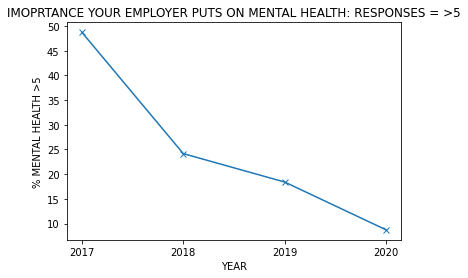

In [45]:
#imp_value.to_csv('Output_CSV/weather_data.csv')
x_values = ["2017", "2018", "2019", "2020"]
y_value = mental_and_physical_df["12_IMPORTANCE_EMPLOY_MENTAL_HEALTH"]
plt.plot(x_values, y_value, marker = 'x')


plt.xlabel("YEAR")
plt.ylabel("% MENTAL HEALTH >5")
plt.title("IMOPRTANCE YOUR EMPLOYER PUTS ON MENTAL HEALTH: RESPONSES = >5")

Text(0.5, 1.0, 'IMOPRTANCE YOUR EMPLOYER PUTS ON PHYSICAL HEALTH: RESPONSES = >5')

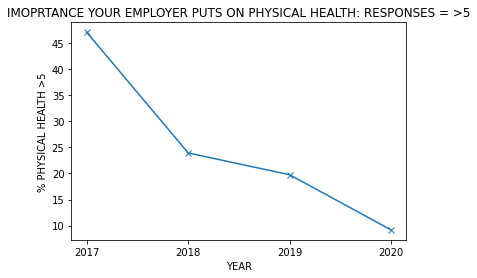

In [46]:
y_value_2 = mental_and_physical_df["11_IMPORTANCE_EMPLOY_PHYS_HEALTH"]
plt.plot(x_values, y_value_2, marker = 'x')


plt.xlabel("YEAR")
plt.ylabel("% PHYSICAL HEALTH >5")
plt.title("IMOPRTANCE YOUR EMPLOYER PUTS ON PHYSICAL HEALTH: RESPONSES = >5")

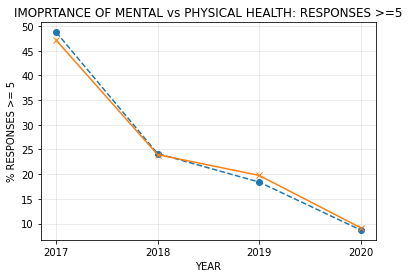

In [50]:
x_values = ["2017", "2018", "2019", "2020"]

plt.plot(x_values, y_value, marker = 'o',linestyle = "dashed" )
plt.plot(x_values, y_value_2, marker = 'x')
plt.grid(linestyle='-', linewidth=0.5, alpha = 0.5)
plt.xlabel("YEAR")
plt.ylabel("% RESPONSES >= 5")
plt.title("IMOPRTANCE OF MENTAL vs PHYSICAL HEALTH: RESPONSES >=5")
plt.savefig("Images/IMPORTANCE MENTAL VS PHSICAL great equal 5")
plt.show()
